In [17]:
# Loading required packages for basic Summary:

library(dplyr)
library(ggplot2)
library(stringr)

In [18]:
# Read data into R

manual <- read.delim("D:/Portfolio/Data Engineer Track/Python/Uzaki chan Text Analytics/Transcriptions/Season 1/Done/combined.txt", header = T, stringsAsFactors = F)


In [19]:
library(udpipe)
model <- udpipe_download_model(language = "english")
udmodel_english <- udpipe_load_model(file = 'english-ewt-ud-2.4-190531.udpipe')


Visit https://github.com/jwijffels/udpipe.models.ud.2.4 for model license details


In [20]:
# Annotate Input Text Data 

s <- udpipe_annotate(udmodel_english, manual$Now.there.s.a.sight.for.sore.eyes..Nothing.says.spring.quite.like.this..Oh..hey..Uzaki..right.)

x <- data.frame(s)


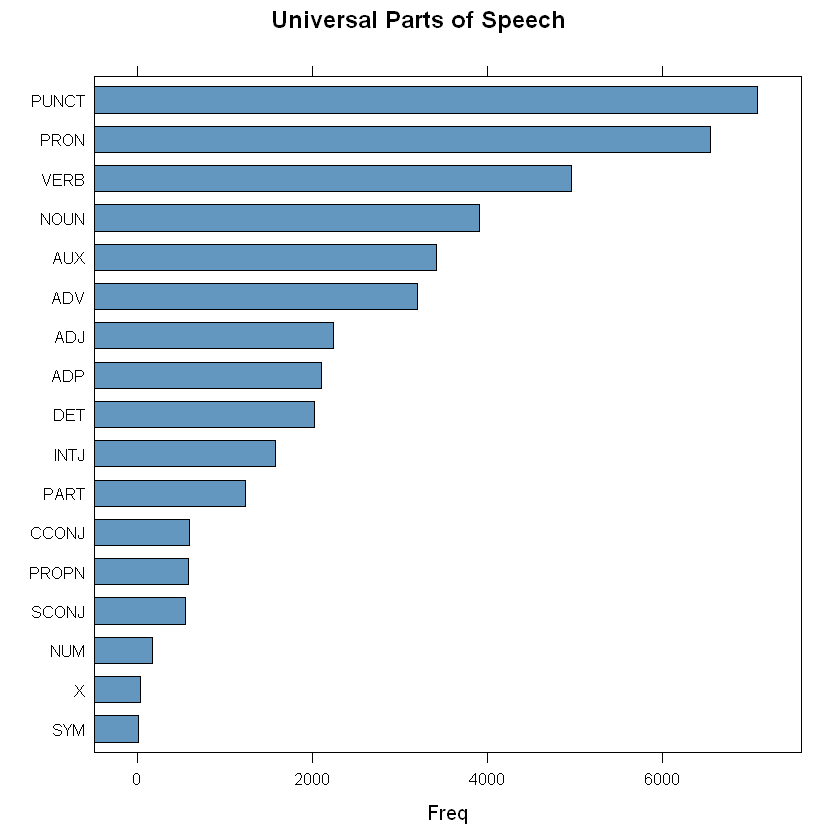

In [21]:
# Universal part-of-speech tags from the given text

library(lattice)
stats <- txt_freq(x$upos)
stats$key <- factor(stats$key, levels = rev(stats$key))
barchart(key ~ freq, data = stats, col = "#6497bf", 
         main = "Universal Parts of Speech", xlab = "Freq"
)

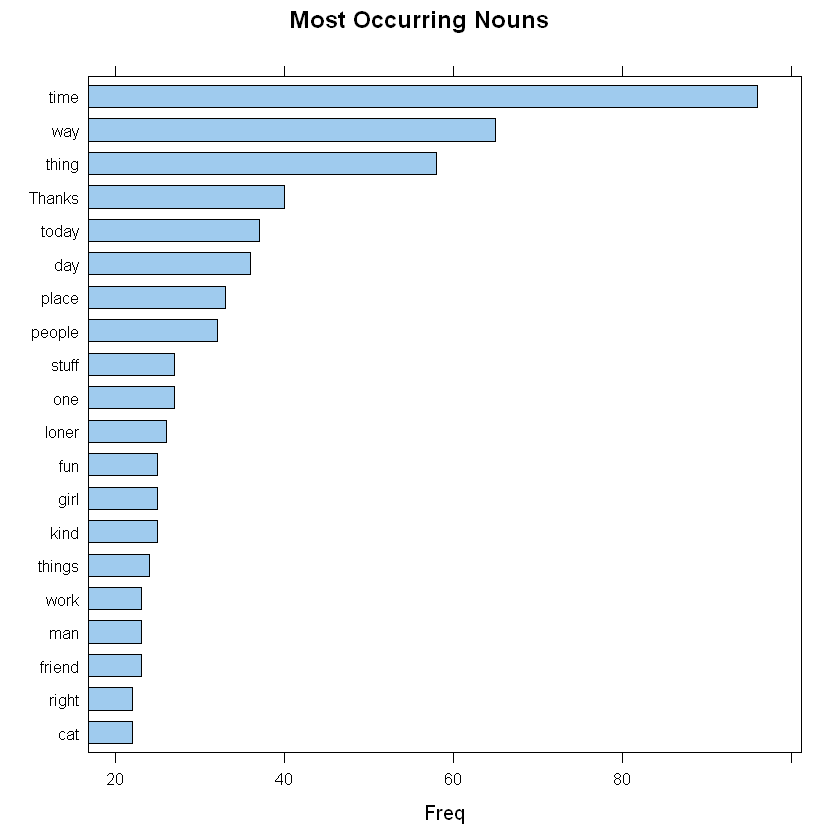

In [22]:
# Most Occurring Nouns

stats <- subset(x, upos %in% c("NOUN"))
stats <- txt_freq(stats$token)
stats$key <- factor(stats$key, levels = rev(stats$key))
barchart(key ~ freq, data = head(stats, 20), col = "#9fcbee",
         main = "Most Occurring Nouns", xlab = "Freq")


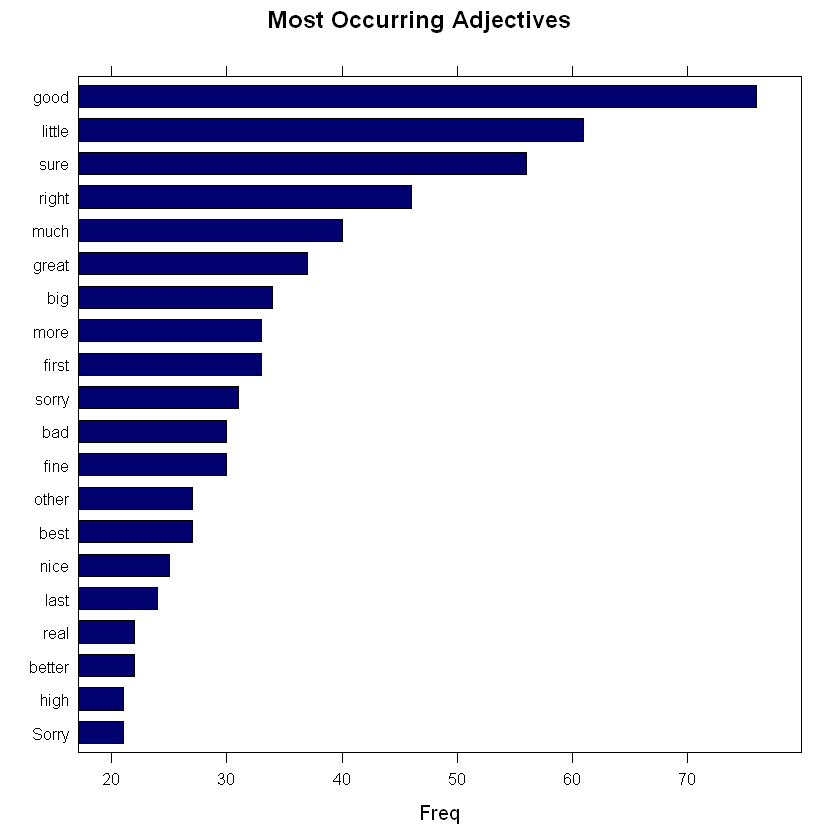

In [23]:
# Most Occurring Adjectives
stats <- subset(x, upos %in% c("ADJ"))
stats <- txt_freq(stats$token)
stats$key <- factor(stats$key, levels = rev(stats$key))
barchart(key ~ freq, data = head(stats, 20), col = "#01016f",
         main = "Most Occurring Adjectives", xlab = "Freq") 

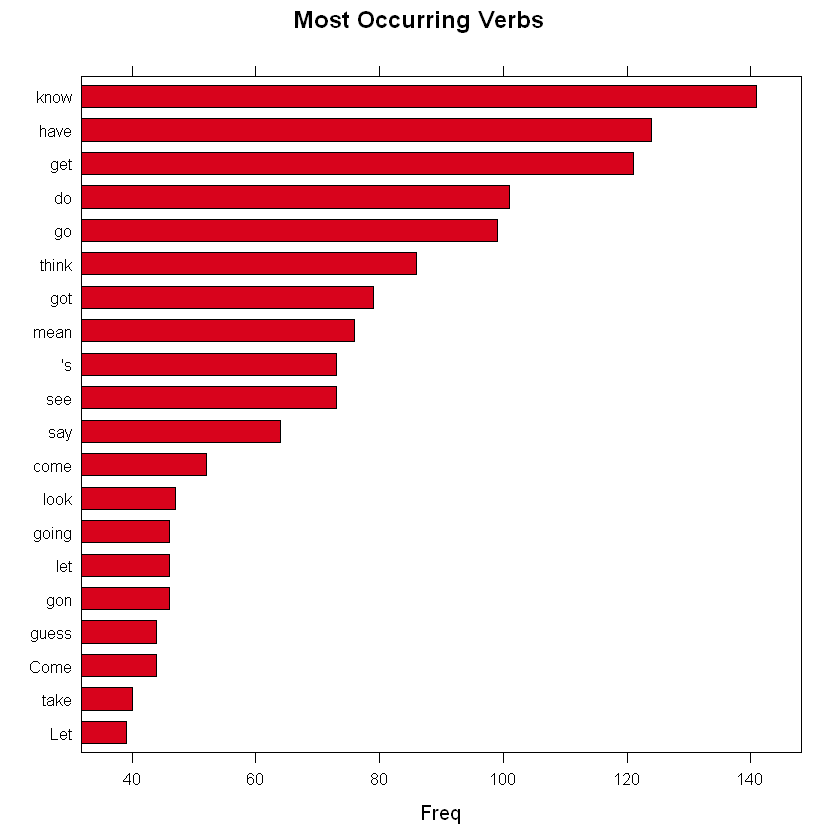

In [24]:
# Verbs
stats <- subset(x, upos %in% c("VERB"))
stats <- txt_freq(stats$token)
stats$key <- factor(stats$key, levels = rev(stats$key))
barchart(key ~ freq, data = head(stats, 20), col = "#d8031c",
         main = "Most Occurring Verbs", xlab = "Freq")


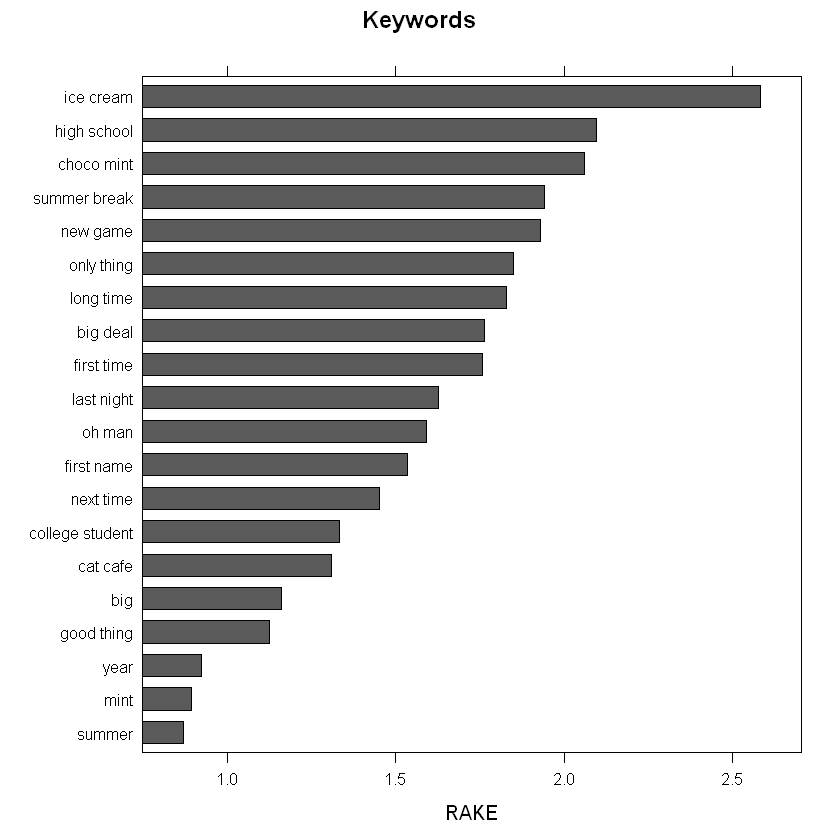

In [25]:
# Using RAKE - Keywords Extraction 

stats<- keywords_rake(x = x, term = "lemma", group = "doc_id",
                      relevant = x$upos %in% c("NOUN", "ADJ"))

stats$key <- factor(stats$keyword, levels = rev(stats$keyword))
barchart(key ~ rake, data = head(subset(stats, freq > 3), 20), col = "#5a5a5a",
         main = "Keywords",
         xlab = "RAKE")

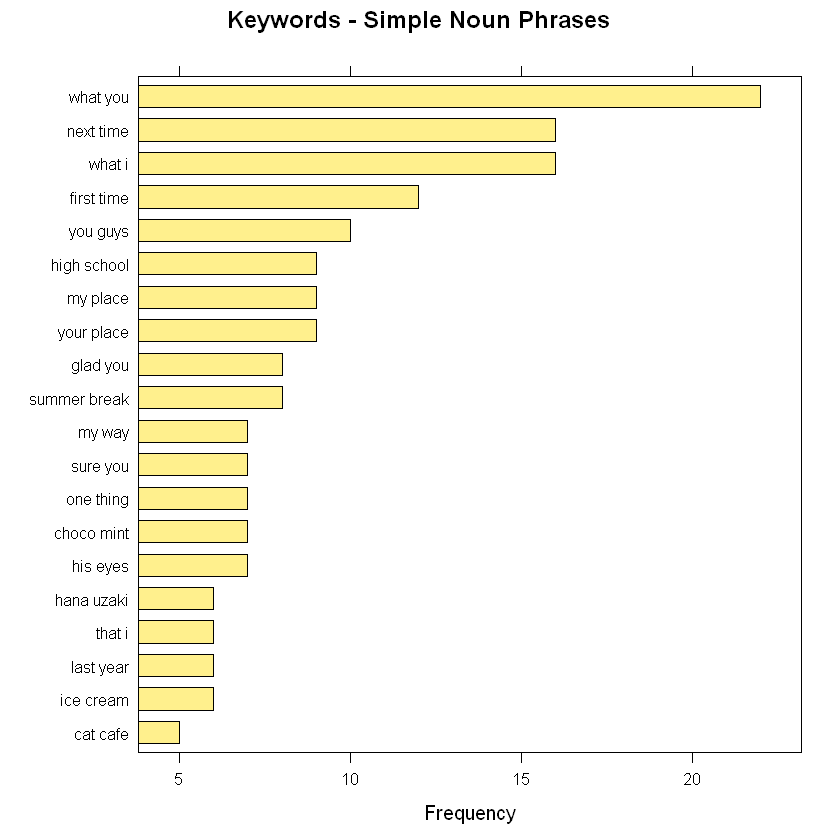

In [26]:
# Top Noun-Verb Pairs as Keyword Pairs / Using a sequence of POS tags (noun/phrases / verb phrases)
x$phrase_tag <- as_phrasemachine(x$upos, type = "upos")
stats <- keywords_phrases(x = x$phrase_tag, term = tolower(x$token),
                          pattern = "(A|N)*N(P+D*(A|N)*N)*",
                          is_regex = TRUE, detailed = FALSE)

stats <- subset(stats, ngram > 1 & freq > 3)
stats$key <- factor(stats$keyword, levels = rev(stats$keyword))
barchart(key ~ freq, data = head(stats, 20), col = "#FFF08D",
         main = "Keywords - Simple Noun Phrases", xlab = "Frequency")                          

stats <- merge(x, x, 
               by.x = c("doc_id", "paragraph_id", "sentence_id", "head_token_id"),
               by.y = c("doc_id", "paragraph_id", "sentence_id", "token_id"),
               all.x = TRUE, all.y = FALSE, 
               suffixes = c("", "_parent"), sort = FALSE)


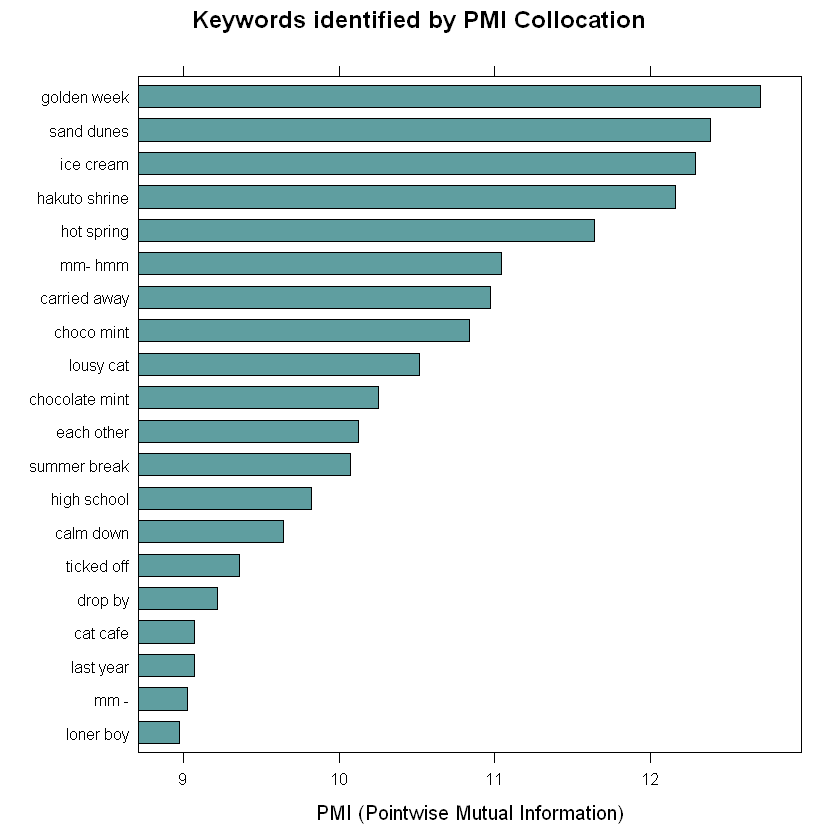

In [27]:
# Using Pointwise Mutual Information Collocations
x$word <- tolower(x$token)
stats <- keywords_collocation(x = x, term = "word", group = "doc_id")
stats$key <- factor(stats$keyword, levels = rev(stats$keyword))
barchart(key ~ pmi, data = head(subset(stats, freq > 3), 20), col = "cadetblue", 
         main = "Keywords identified by PMI Collocation", 
         xlab = "PMI (Pointwise Mutual Information)")
